<h1>Численные методы </h1>

<h3>Вариант 1 </h3>

Одна из специальных функций математической физики - функция Бесселя, определяется следующим образом:

$J_{0}(x) = \frac{1}{\pi}\int_{0}^{\pi}cos(xcost)dt$

Цель задания - изучить и сравнить различные способы приближенного вычисления этой функции.

Для этого:

1 Протабулировать $J_{0}(x)$ на отрезке [a,b] с шагом h с точностью $\varepsilon$, основываясь на ряде Тейлора, предварительно вычислив его:

$J_{0}(x)=\sum_{n=0}^{\infty}(-1)^{n}\frac{(x^2/4)^n}{(x!)^2}$

Множитель $q_{n}$ может быть получен из уравнения:

$q_{n} = \frac{a_{n+1}}{a_{n}}$

Вычисляя его получим:

$q_{n} = -\frac{x^2/4}{(n+1)^2} $

Следующий член ряда находится по формуле:

$a_{n+1} = a_{n}*q_{n} $

Импортирование всех необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

Массивы для хранения значений:

In [2]:
matrixNodes = []
matrixFunc = []

Функция для приближеннего вычесления значений функции Бесселя:

In [3]:
eps = 10 ** (-6)

def function(node):
    sum = 1
    n = 0
    an = sum
    while True:
        anplus1 = -(node ** 2) / (4 * (n + 1) ** 2) * an
        if abs(anplus1) < eps:
            break
        sum += anplus1
        an = anplus1
        n += 1
    return sum

Функция вычисляющая значения функции на открезке [a,b] с шагом h:

In [4]:
def work1(a, b, num):
    table = []
    h = (b - a) /  num
    i = a
    while i <= b:
        a = [i, function(i)]
        table.append(a)
        i += h
    
    for value in table:
        matrixNodes.append(value[0])
        matrixFunc.append(value[1])

Вызов функции:

     x         y
0  0.0  1.000000
1  0.6  0.912005
2  1.2  0.671133
3  1.8  0.339986
4  2.4  0.002508
5  3.0 -0.260052


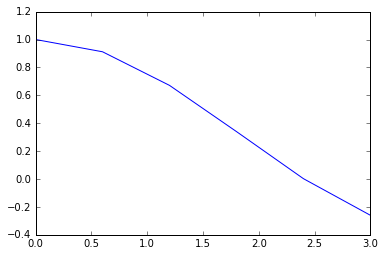

In [5]:
work1(0,3,5)
frame = pd.DataFrame({"x":matrixNodes, "y":matrixFunc})
print(frame)
%matplotlib inline
plt.plot(matrixNodes, matrixFunc)
plt.show()


По полученной таблице значений построим интерполяционный полином Ньютона, приближающий $J_{0}(x)$:

$L_{n}(x) = f(x_{0})+(x-x_{0})f(x_{0},x_{1})+(x-x_{0})(x-x_{1})f(x_{0},x_{1},x_{2}) + ... + (x-x_{0})(x-x_{1})...(x-x_{n})f(x_{0},x_{1},...,x_{n})$

и вычислим погрешность интерполирования:

$\varepsilon_{n} = max_{x \epsilon(a,b)} \varepsilon(x), \varepsilon(x) = |J_{0}(x) - L_{n}(x)|$

Вспомогательная функция для вычисления разделенных разностей:

In [6]:
def koeffEnd(matrixNodes, matrixFunc, shift):
    # print("x: ", matrixNodes)
    # print("y: ", matrixFunc)
    count = 0
    result = []
    length = matrixNodes.__len__()
    while count < length - 1 - shift:
        result.append(
            (matrixFunc[count + 1] - matrixFunc[count]) / (matrixNodes[count + 1 + shift] - matrixNodes[count]))
        count += 1
    # print(result)
    return result

In [7]:
def work2(matrixNodes, matrixFunc, x):
    result = []
    count = 0
    temp = matrixFunc
    length = matrixNodes.__len__()
    while count < length - 1:
        result.append(koeffEnd(matrixNodes, temp, count))
        temp = result[count]
        count += 1
    count = 0
    end = []
    end.append(matrixFunc[0])
    while count < length - 1:
        end.append(result[count][0])
        count += 1
    # print(end)
    return newtonPolynomial(end, matrixNodes, x)

In [8]:
def newtonPolynomial(koeff, matrixNodes, x):
    length = koeff.__len__()
    count = 1
    sum = koeff[0]
    while count < length:
        num = 0
        temp = 1
        while num < count:
            temp *= (x - matrixNodes[num])
            num += 1
        temp *= koeff[count]
        sum += temp
        count += 1
    return sum

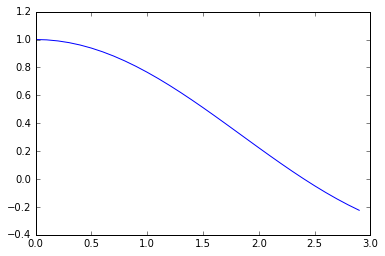

In [9]:
x = np.arange(0,3,0.1)
y = work2(matrixNodes, matrixFunc, x)
plt.plot(x,y)
plt.show()

Вычислим максимальную погрешность:

        J(x)      L(x)    x   |L(x)-J(x)|
0   1.000000  1.000000  0.0  0.000000e+00
1   0.977627  0.977533  0.3  9.328715e-05
2   0.912005  0.912005  0.6  0.000000e+00
3   0.807524  0.807548  0.9  2.414658e-05
4   0.671133  0.671133  1.2  0.000000e+00
5   0.511828  0.511816  1.5  1.169322e-05
6   0.339986  0.339986  1.8  0.000000e+00
7   0.166607  0.166615  2.1  8.323544e-06
8   0.002508  0.002508  2.4  4.423545e-17
9  -0.142449 -0.142452  2.7  2.476087e-06
10 -0.260052 -0.260052  3.0  1.665335e-16


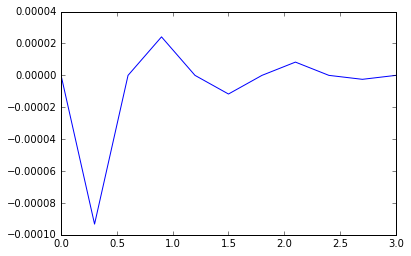

9.3287150892e-05


In [10]:
x = np.arange(0,3.3,0.3)
l = work2(matrixNodes, matrixFunc, x)
j = []
for i in x:
    j.append(function(i))
frame = pd.DataFrame({"x":x, "L(x)":l, "J(x)":j, "|L(x)-J(x)|":abs(l-j)})
print(frame)
plt.plot(x,(l-j))
plt.show()
print(max(abs(l-j)))

Максимальное расхождение:

In [11]:
eps = max(abs(l-j))
print(eps)

9.3287150892e-05


        J(x)      L(x)         x   |L(x)-J(x)|
0   0.998264  1.012197  0.083333  1.393279e-02
1   0.993056  0.993056  0.166667  0.000000e+00
2   0.984375  0.983083  0.250000  1.291541e-03
3   0.972415  0.972415  0.333333  0.000000e+00
4   0.957068  0.957296  0.416667  2.280348e-04
5   0.938477  0.938477  0.500000  0.000000e+00
6   0.916740  0.916690  0.583333  4.947771e-05
7   0.891975  0.891975  0.666667  0.000000e+00
8   0.864319  0.864287  0.750000  3.164777e-05
9   0.833779  0.833779  0.833333  2.220446e-16
10  0.800705  0.800686  0.916667  1.976168e-05
11  0.765191  0.765191  1.000000  1.110223e-16
12  0.727417  0.727432  1.083333  1.515286e-05
13  0.687575  0.687575  1.166667  1.110223e-16
14  0.645866  0.645847  1.250000  1.955170e-05
15  0.602500  0.602500  1.333333  0.000000e+00
16  0.557800  0.557762  1.416667  3.784355e-05
17  0.511832  0.511832  1.500000  0.000000e+00
18  0.464893  0.464906  1.583333  1.291890e-05
19  0.417220  0.417220  1.666667  5.551115e-17
20  0.369050 

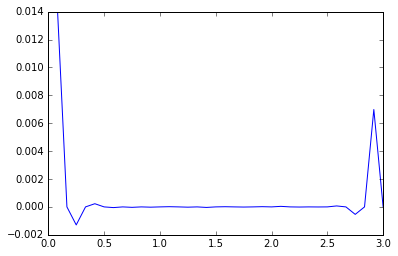

In [12]:
matrixNodes = []
matrixFunc = []

work1(0,3,18)

x = np.arange(0+(3/36),(3+3/36),(3/36))
l = work2(matrixNodes, matrixFunc, x)
j = []
for i in x:
    j.append(function(i))
frame = pd.DataFrame({"x":x, "L(x)":l, "J(x)":j, "|L(x)-J(x)|":abs(l-j)})
print(frame)
plt.plot(x,(l-j))
plt.show()
#print(max(abs(l-j)))


In [13]:
#def chebishov()

На той же сетке узлов $\left \{x_{i} \right \} _{i=0}^{n}$ построить таблицу приближенных значений $J_{0}(x)$, используя составную квадратурную формулу трапеций:

$\int_{c}^{d}\phi (t)dt = \sum_{i=1}^{N}\int_{z_{i-1}}^{z_{i}}\phi(t)dt\approx \sum_{i=1}^{N}S_{i}(\phi)$,

где $S_{i}(\phi)=h_{N}\frac{\phi(z_{i-1})+\phi(z_{i})}{2}$, а $z_{i}$ - точки разбиения отрезка интегрирования на N частей, 

$z_{i}=c+i*h_{N}$, $h_{N}=\frac{c-d}{N}$.

Интеграл вычислить с точностью $\varepsilon = 10^{-4}$. Точность вычисления интеграла определяется сравнением результатов при различном числе разбиения отрезка интегрирования, а именно, точность $\varepsilon$ считается достигнутой, если:

$|S^{N}(\phi)-S^{2N}(\phi)|\leqslant \varepsilon$,

$S^{N}(\phi)=\sum_{i=1}^{N}S_{i}(\phi)$.

Функция для расчета $S^{N}(\phi)$:

In [14]:
def trapeze(a, b, num):
    z = []
    s = []
    h = (b-a)/num
    i = 0
    while i < num:
        z.append(a + i*h)
        i+=1
    i = 1
    while i < num:
        s.append(h*(work2(matrixNodes, matrixFunc,z[i-1]) + (work2(matrixNodes, matrixFunc,z[i])))/2)
        i+=1
    return sum(s)

Функция для вычисления интеграла с заданной точностью $\varepsilon$:

In [15]:
eps = 10**(-4)

def work3(a, b, num):
    s1 = trapeze(a, b, num)
    tNum = num
    while True:
        tNum *= 2
        s2 = trapeze(a,b,tNum)
        if abs(s2 - s1) < eps:
            break
        #print(s1-s2)
        s1 = s2
    return s1
work3(0,3, 100)
#print(trapeze(0,3,40))

0.003568595178670808
0.0018548136381237867
0.0009493481116740199
0.00048085682051945966
0.0002420729704917246
0.00012146077666885802


1.390214346737645